# HR Diagram with Gaia magnitudes

## Learning Goals
By the end of this tutorial, you will:
- Know how to access and read the DR19 ASPCAP summary file
- Understand some basic quality flags
- Understand how to apply _semaphore_ targeting flags
- Have a plot of the SNC HR digram

## Introduction
In this notebook we will plot an HR diagram for stars in the solar neighborhood observed by MWM using Gaia magnitudes and color code stars by the ASPCAP metallicity. This notebook also provides an example of removing unreliable stars and masking the data for specific SDSS observing programs.

## Imports
This tutorial requires three commonly used python packages, and an SDSS specific package
- _numpy_ for doing large array operations
- _matplotlib_ for plotting
- _astropy_ for reading fits table
- _sdss_semaphore_ for processing targeting flags

Missing packages can be installed via `pip install numpy matplotlib astropy sdss_semaphore`

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from sdss_semaphore.targeting import TargetingFlags

## Read in the ASPCAP data

In this example, we will use the ASPCAP summary file, which contains observing details, stellar parameters, stellar abundances, and other data for 1,095,480 stars.

To download this file directly from the SAS, go to [https://dr19.sdss5.org/sas/dr19/spectro/astra/0.6.0/summary/astraAllStarASPCAP-0.6.0.fits.gz](https://dr19.sdss5.org/sas/dr19/spectro/astra/0.6.0/summary/astraAllStarASPCAP-0.6.0.fits.gz). Note this file is over 1 GB in size; if you prefer not to download such a large file, this notebook is available to run and interact with on [SciServer](https://www.sciserver.org/)

In [2]:
# Load in astra file

localpath = '/home/idies/workspace/sdss_sas/dr19/spectro/astra/0.6.0/summary/'
fname = 'astraAllStarASPCAP-0.6.0.fits.gz'

aspcap = Table.read(localpath+fname, format='fits', hdu=2)
print('astraAllStarASPCAP contains %d stars' % len(aspcap))

astraAllStarASPCAP contains 1095480 stars


Some of the stars observed by SDSS have unreliable stellar parameters. These stars are flaged with the ```flag_bad``` column set to ```True```. We remove these stars and are left with 839,728.

In [3]:
# Filter out bad stars
aspcap_good = aspcap[np.logical_not(aspcap['flag_bad'])]
print('astraAllStarASPCAP contains %d unflagged stars' % len(aspcap_good))

astraAllStarASPCAP contains 792109 unflagged stars


## Gaia metadata

The astra summary files contain meta-data from gaia, including the geometric distance estimates, G magnitude, BP magnitude, and RP magnitude. Let's use this information to plot an HR diagram, colored by ASPCAP metallicity [Fe/H].

In [4]:
# Calculate distance
l = aspcap_good["l"]
b = aspcap_good["b"]
X = aspcap_good["r_med_geo"] * np.cos(b*np.pi/180) * np.cos(l*np.pi/180)
Y = aspcap_good["r_med_geo"] * np.cos(b*np.pi/180) * np.sin(l*np.pi/180)
Z = aspcap_good["r_med_geo"] * np.sin(b*np.pi/180)
dist = np.sqrt((X)**2+(Y)**2+(Z)**2)

SDSS has introduced the _semaphore_ product in DR19 to assist in determining targeting imformation. A detailed description of targeting in SDSS V is available on our [website](https://testng.sdss.org/dr19/targeting/). Below, we select all targets included in the "mwm_snc" program.

In [5]:
# Select stars you want to include based on mapper, program, or carton
flags = TargetingFlags(aspcap_good['sdss5_target_flags'])
mask = flags.in_mapper('mwm')
mask = flags.in_program('mwm_snc')

In [6]:
# calcualte absolute G magnitde and BP-RP color
gmag = aspcap_good['g_mag'] - (5 * np.log10(dist)) + 5
bp_rp_color = aspcap_good['bp_mag'] - aspcap_good['rp_mag']
fe_h = aspcap_good['fe_h']

/tmp/ipykernel_1673196/3185504291.py:2: RuntimeWarning: divide by zero encountered in log10
  gmag = aspcap_good['g_mag'] - (5 * np.log10(dist)) + 5


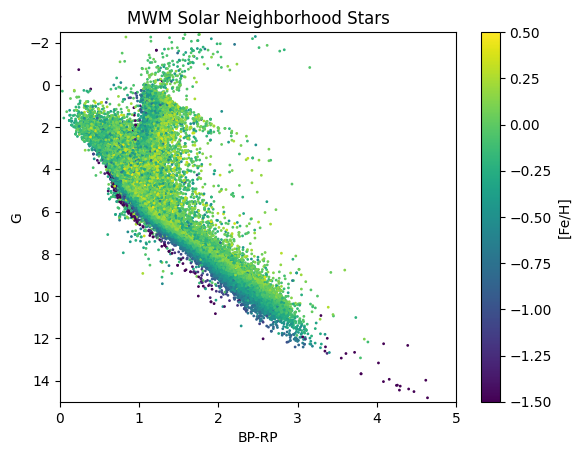

In [7]:
# Plot an HR diagram colored by [Fe/H]
plt.scatter(bp_rp_color[mask], gmag[mask], s=1, c=fe_h[mask], vmin=-1.5, vmax=0.5)
cbar = plt.colorbar()
plt.ylim(15, -2.5)
plt.xlim(0,5)
cbar.set_label('[Fe/H]')
plt.xlabel('BP-RP')
plt.ylabel('G')
plt.title('MWM Solar Neighborhood Stars')
plt.show()

### About this notebook

This notebook was created to give an example of using the ASPCAP all star file to select a useful subset of targets.

**Authors**: Emily Griffith

**Last Update**: 2025 April 21

If you use `astropy`  for published research, please cite the
authors. Follow this link for more information about citing `astropy`:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)

And of course please [cite](https://sdss.org/collaboration/citing-sdss/) SDSS when you use our data.